# Load Packages

In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import norm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
import scipy, scipy.stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import statsmodels as sm

# Load Data

In [4]:
LowestPoverty = pd.read_excel('C:/Users/Aarons/Documents/GitHub/finalprojectstarwarriors/Whitney-branch/finalprojectstarwarriors/Whitney branch/PvsC2.xlsx')
LowestPoverty.head()

,Name,State,Race,Count,Poverty%,Insured,Population,Poverty Rank,2019Poverty%,2014Poverty%
0,Corpus Uteri,New Jersey,Black or African American,221,11,90.8,9005644,7,10.0%,10.7%
1,Ovary,New Jersey,American Indian or Alaska Native,0,11,90.8,9005644,7,10.0%,10.7%
2,Ovary,New Jersey,Asian or Pacific Islander,64,11,90.8,9005644,7,10.0%,10.7%
3,"Uterus, NOS",New Jersey,Black or African American,23,11,90.8,9005644,7,10.0%,10.7%
4,Cervix Uteri,New Jersey,Asian or Pacific Islander,27,11,90.8,9005644,7,10.0%,10.7%


In [5]:
LowestPoverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          200 non-null    object 
 1   State         200 non-null    object 
 2   Race          200 non-null    object 
 3   Count         200 non-null    int64  
 4   Poverty%      200 non-null    int64  
 5   Insured       200 non-null    float64
 6   Population    200 non-null    int64  
 7   Poverty Rank  200 non-null    int64  
 8   2019Poverty%  200 non-null    object 
 9   2014Poverty%  200 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [6]:
uniqueValues = LowestPoverty['State'].unique()
print('Unique elements in column "State" ')
print(uniqueValues)

Unique elements in column "State" 
['New Jersey' 'Massachusetts' 'Utah' 'New Hampshire' 'Colorado' 'Hawaii'
 'Maryland' 'Virginia' 'Minnesota' 'Connecticut']


In [30]:
uniqueValues2 = LowestPoverty['Count'].unique()
print('Unique elements in column "Count" ')
print(uniqueValues2)

Unique elements in column "Count" 
[ 221    0   64   23   27   94   71   31   77  152   29  546 1466   81
  305   42   25   28   30   82   22  114  145  348   61   39  264   18
  291   63   55   16  200   50   33   17  326   75   24  100   37   78
  127   34  307  240   84   21   65   57  925  430  166   58   26 1010
   96  108  327  136   59  604   19   98]


# Question

## Which state has the highest cancer level according to the poverty% in the 10 states with the lowest poverty rate?

# Data Wrangling

In [7]:
label_encoder =LabelEncoder()

In [8]:
LowestPoverty['StateR']= label_encoder.fit_transform(LowestPoverty['State'])

In [11]:
LowestPoverty1 = LowestPoverty.rename(columns={'Poverty%': 'PovertyRate'}, inplace=True)

In [12]:
LowestPoverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          200 non-null    object 
 1   State         200 non-null    object 
 2   Race          200 non-null    object 
 3   Count         200 non-null    int64  
 4   PovertyRate   200 non-null    int64  
 5   Insured       200 non-null    float64
 6   Population    200 non-null    int64  
 7   Poverty Rank  200 non-null    int64  
 8   2019Poverty%  200 non-null    object 
 9   2014Poverty%  200 non-null    object 
 10  StateR        200 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 16.5+ KB


In [13]:
LowestPoverty2 = LowestPoverty[['StateR', 'Count', 'PovertyRate']]

# Test Assumptions

## Normality

C:\Users\Aarons\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PovertyRate', ylabel='Density'>

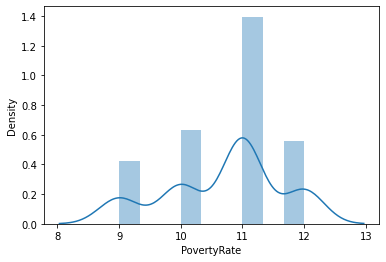

In [14]:
sns.distplot(LowestPoverty2['PovertyRate'])

## Homogeneity of Variance

### Bartlett's Test

In [15]:
scipy.stats.bartlett(LowestPoverty2['PovertyRate'], LowestPoverty2['StateR'])

BartlettResult(statistic=200.63060562976167, pvalue=1.5213204095702873e-45)

In [16]:
scipy.stats.bartlett(LowestPoverty2['PovertyRate'], LowestPoverty2['Count'])

BartlettResult(statistic=1777.2670666523452, pvalue=0.0)

In [17]:
scipy.stats.bartlett(LowestPoverty2['Count'], LowestPoverty2['StateR'])

BartlettResult(statistic=1343.9310667342936, pvalue=3.2100059756464995e-294)

### Fligner's Test

In [18]:
scipy.stats.fligner(LowestPoverty2['PovertyRate'], LowestPoverty2['StateR'])

FlignerResult(statistic=146.14580604795822, pvalue=1.2063292763899527e-33)

In [19]:
scipy.stats.fligner(LowestPoverty2['PovertyRate'], LowestPoverty2['Count'])

FlignerResult(statistic=20.922937384018223, pvalue=4.781349391544244e-06)

In [20]:
scipy.stats.fligner(LowestPoverty2['Count'], LowestPoverty2['StateR'])

FlignerResult(statistic=3.798077028792475, pvalue=0.05131148014523049)

##### There are Violations of Homogeneity of Variance

### Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption)

### Post Hocs

#### Computing Post Hocs with Tukey's

In [21]:
postHoc = MultiComparison(LowestPoverty2['PovertyRate'], LowestPoverty2['Count'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0     16   0.8421   0.9 -2.2043 3.8885  False
     0     17  -0.4079   0.9 -2.5805 1.7647  False
     0     18   0.3421   0.9 -2.7043 3.3885  False
     0     19  -0.6579   0.9 -4.9475 3.6317  False
     0     21   0.3421   0.9 -2.7043 3.3885  False
     0     22   0.3421   0.9 -3.9475 4.6317  False
     0     23  -0.4579   0.9 -2.4093 1.4935  False
     0     24  -0.6579   0.9 -4.9475 3.6317  False
     0     25   0.8421   0.9 -2.2043 3.8885  False
     0     26   0.3421   0.9 -3.9475 4.6317  False
     0     27   0.3421   0.9 -2.7043 3.3885  False
     0     28  -0.4079   0.9 -2.5805 1.7647  False
     0     29   0.3421   0.9 -2.7043 3.3885  False
     0     30   0.3421   0.9 -3.9475 4.6317  False
     0     31   0.3421   0.9 -3.9475 4.6317  False
     0     33   0.3421   0.9 -3.9475 4.6317  False
     0     34  -0.6579   0.9 -

In [23]:
postHoc = MultiComparison(LowestPoverty2['PovertyRate'], LowestPoverty2['StateR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     0      1     -2.0  0.001  -2.0  -2.0   True
     0      2     -1.0  0.001  -1.0  -1.0   True
     0      3     -2.0  0.001  -2.0  -2.0   True
     0      4     -1.0  0.001  -1.0  -1.0   True
     0      5     -1.0  0.001  -1.0  -1.0   True
     0      6     -3.0  0.001  -3.0  -3.0   True
     0      7     -1.0  0.001  -1.0  -1.0   True
     0      8      0.0 0.5566   0.0   0.0  False
     0      9     -1.0  0.001  -1.0  -1.0   True
     1      2      1.0  0.001   1.0   1.0   True
     1      3      0.0 0.5566   0.0   0.0  False
     1     

In [22]:
postHoc = MultiComparison(LowestPoverty2['PovertyRate'], LowestPoverty2['StateR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

C:\Users\Aarons\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
C:\Users\Aarons\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: invalid value encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic



NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     0      1     -2.0  0.001  -2.0  -2.0   True
     0      2     -1.0  0.001  -1.0  -1.0   True
     0      3     -2.0  0.001  -2.0  -2.0   True
     0      4     -1.0  0.001  -1.0  -1.0   True
     0      5     -1.0  0.001  -1.0  -1.0   True
     0      6     -3.0  0.001  -3.0  -3.0   True
     0      7     -1.0  0.001  -1.0  -1.0   True
     0      8      0.0 0.5566   0.0   0.0  False
     0      9     -1.0  0.001  -1.0  -1.0   True
     1      2      1.0  0.001   1.0   1.0   True
     1      3      0.0 0.5566   0.0   0.0  False
     1     

### Computing Post Hocs When You've Violated the Assumption of Homogeneity of Variance

## Determine Means and Draw Conclusions

In [29]:
LowestPoverty2.groupby('StateR').mean()

,Count,PovertyRate
StateR,,
0,34.076923,12.0
1,45.300000,10.0
2,19.052632,11.0
3,53.727273,10.0
4,32.333333,11.0
5,108.937500,11.0
6,15.571429,9.0
7,144.863636,11.0
8,24.416667,12.0


In [31]:
Total = LowestPoverty2['Count'].sum()
print (Total)

11736


In [32]:
LowestPoverty2.loc['Total'] = LowestPoverty2['Count'].sum()
print (LowestPoverty2)

       StateR  Count  PovertyRate
0           7    221           11
1           7      0           11
2           7     64           11
3           7     23           11
4           7     27           11
...       ...    ...          ...
196         1    604           10
197         1     19           10
198         1     57           10
199         1     98           10
Total   11736  11736        11736

[201 rows x 3 columns]


C:\Users\Aarons\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


#### New Jersey has the highest cancer level according to the percent population below poverty in the 10 states with the lowest poverty rate.